<a href="https://colab.research.google.com/github/Locchuong96/Machine-Learning/blob/main/data_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
rm -rf Data-Competition

In [1]:
# !git clone https://github.com/ultralytics/yolov5
!git clone https://github.com/fsoft-ailab/Data-Competition.git

Cloning into 'Data-Competition'...
remote: Enumerating objects: 185, done.
remote: Counting objects: 100% (185/185), done.
remote: Compressing objects: 100% (138/138), done.
remote: Total 185 (delta 83), reused 122 (delta 38), pack-reused 0
Receiving objects: 100% (185/185), 25.08 MiB | 29.35 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pwd

/content


In [3]:
cd Data-Competition

/content/Data-Competition


In [4]:
# install requirements
!pip install -r requirements.txt

     |████████████████████████████████| 3.1 MB 29.8 MB/s 
     |████████████████████████████████| 596 kB 37.0 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 7.1.2
    Uninstalling Pillow-7.1.2:
      Successfully uninstalled Pillow-7.1.2
  Attempting uninstall: PyYAML
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


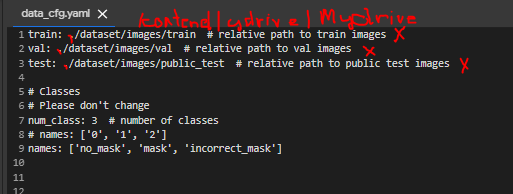

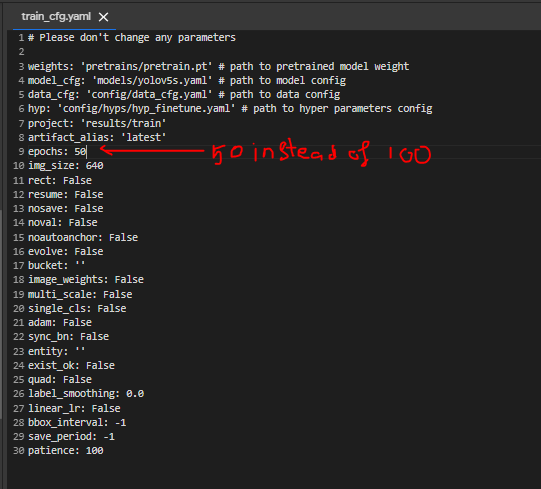

In [ ]:
# /content/gdrive/MyDrive/dataset/images/train /content/gdrive/MyDrive/dataset
!python train.py --name test

100% 755k/755k [00:00<00:00, 72.8MB/s]
Train: data_cfg=config/data_cfg.yaml, batch_size=64, cache=None, device=, workers=8, name=test, weights=pretrains/pretrain.pt, model_cfg=models/yolov5s.yaml, hyp=config/hyps/hyp_finetune.yaml, project=results/train, artifact_alias=latest, epochs=50, img_size=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, evolve=False, bucket=, image_weights=False, multi_scale=False, single_cls=False, adam=False, sync_bn=False, entity=, exist_ok=False, quad=False, label_smoothing=0.0, linear_lr=False, bbox_interval=-1, save_period=-1, patience=100
YOLOv5 🚀 63741b6 torch 1.10.0+cu111 CPU

cpu
Hyper parameters: lr0=0.0032, lrf=0.2, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.0, hsv_s=0.0, hsv_v=0.0, degrees=0.0, translate=0.0, scale=0.0, shear=0.0, perspective=0.0, flipud=0.0, fliplr=0.0

In [ ]:
# copy trained files to mydrive
!cp -r /content/Data-Competition/results/train/test /content/gdrive/MyDrive/yolov5-mask_competition

In [ ]:
# Remove the evaluate folder
!rm -rf /content/Data-Competition/results/evaluate

In [ ]:
# Evaluation on train dataset
!python val.py --weight /content/Data-Competition/results/train/test/weights/best.pt --task train --name train --batch-size 64 --device 0

val: data=config/data_cfg.yaml, weights=/content/Data-Competition/results/train/test2/weights/best.pt, task=train, name=train, batch_size=64, device=0, img_size=640, conf_threshold=0.001, iou_threshold=0.6, augment=False, exist_ok=False, half=False, project=results/evaluate/train, save_conf=False, save_hybrid=False, save_txt=False, verbose=False, plots=True
YOLOv5 🚀 63741b6 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPs
train: Scanning '/content/gdrive/MyDrive/dataset/labels/train.cache' images and labels... 792 found, 0 missing, 2 empty, 0 corrupted: 100% 792/792 [00:00<?, ?it/s]
    

In [ ]:
# Evaluation on val dataset
!python val.py --weight /content/Data-Competition/results/train/test/weights/best.pt --task val --name val --batch-size 64 --device 0

val: data=config/data_cfg.yaml, weights=/content/Data-Competition/results/train/test2/weights/best.pt, task=val, name=val, batch_size=64, device=0, img_size=640, conf_threshold=0.001, iou_threshold=0.6, augment=False, exist_ok=False, half=False, project=results/evaluate/val, save_conf=False, save_hybrid=False, save_txt=False, verbose=False, plots=True
YOLOv5 🚀 63741b6 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPs
val: Scanning '/content/gdrive/MyDrive/dataset/labels/val.cache' images and labels... 184 found, 0 missing, 1 empty, 0 corrupted: 100% 184/184 [00:00<?, ?it/s]
              

In [ ]:
# Evaluation on puplic_test dataset
!python val.py --weight /content/Data-Competition/results/train/test/weights/best.pt --task test --name puplic_test --batch-size 64 --device 0

val: data=config/data_cfg.yaml, weights=/content/Data-Competition/results/train/test2/weights/best.pt, task=test, name=puplic_test, batch_size=64, device=0, img_size=640, conf_threshold=0.001, iou_threshold=0.6, augment=False, exist_ok=False, half=False, project=results/evaluate/test, save_conf=False, save_hybrid=False, save_txt=False, verbose=False, plots=True
YOLOv5 🚀 63741b6 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPs
test: Scanning '/content/gdrive/MyDrive/dataset/labels/public_test.cache' images and labels... 88 found, 0 missing, 0 empty, 0 corrupted: 100% 88/88 [00:00<?, ?it/s

In [ ]:
# copy trained files to mydrive
!cp -r /content/Data-Competition/results/evaluate /content/gdrive/MyDrive/yolov5-mask_competition

In [ ]:
# Detection
!python detect.py --weights /content/Data-Competition/results/train/test/weights/best.pt --source /content/gdrive/MyDrive/dataset/images/public_test --dir /content/gdrive/MyDrive/yolov5-mask_competition/predicted --device 0

detect: weights=/content/Data-Competition/results/train/test/weights/best.pt, source=/content/gdrive/MyDrive/dataset/images/public_test, dir=/content/gdrive/MyDrive/files/predicted, conf_threshold=0.25, iou_threshold=0.6, device=0, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, half=False, agnostic_nms=False, augment=False, classes=None, exist_ok=False, img_size=[640, 640], nosave=False, view_img=False, visualize=False, max_det=1000, line_thickness=2
YOLOv5 🚀 63741b6 torch 1.10.0+cu111 CUDA:0 (Tesla K80, 11441.1875MB)

Fusing layers... 
/usr/local/lib/python3.7/dist-packages/torch/functional.py:445: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2157.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]
Model Summary: 224 layers, 7059304 parameters, 0 gradients, 16.3 GFLOPs
image 1/88 /content/gdrive/MyDrive